In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

data = pd.read_csv('/Users/nicolas/Documents/OnlineRetail.csv', encoding='unicode_escape')
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
pip install --upgrade ydata-profiling
!pip show ydata-profiling
!pip install --upgrade pip setuptools
%pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix



  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools-76.0.0-py3-none-any.whl.metadata (6.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
Using cached setuptools-76.0.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [6]:
from ydata_profiling import ProfileReport
eda = ProfileReport(data, title='EDA')

In [7]:
eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [9]:
data['Amount'] = data['Quantity'] * data['UnitPrice']
rfm_a = data.groupby('CustomerID')['Amount'].sum()
rfm_a = rfm_a.reset_index()
rfm_a.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
max_date= data['InvoiceDate'].max()
data['Recency'] = max_date - data['InvoiceDate']
rfm_r = data.groupby('CustomerID')['Recency'].min()
rfm_r = rfm_r.reset_index()
rfm_r['Recency'] = rfm_r['Recency'].dt.days
rfm_r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [12]:
rfm = pd.merge(rfm_f,rfm_a, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [13]:
rfm = pd.merge(rfm, rfm_r, how='inner', on='CustomerID')
rfm.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [14]:
q1 = rfm['Frequency'].quantile(0.05)
q3 = rfm['Frequency'].quantile(0.95)
iqr = q3-q1

rfm = rfm[ (rfm['Frequency'] >= q1-1.5*iqr) & (rfm['Frequency'] <= q3 + 1.5*iqr) ]

In [15]:
q1 = rfm['Amount'].quantile(0.05)
q3 = rfm['Amount'].quantile(0.95)
iqr = q3-q1

rfm = rfm[ (rfm['Amount'] >= q1-1.5*iqr) & (rfm['Amount'] <= q3 + 1.5*iqr) ]

In [16]:
q1 = rfm['Recency'].quantile(0.05)
q3 = rfm['Recency'].quantile(0.95)
iqr = q3-q1

rfm = rfm[ (rfm['Recency'] >= q1-1.5*iqr) & (rfm['Recency'] <= q3 + 1.5*iqr) ]

<Axes: >

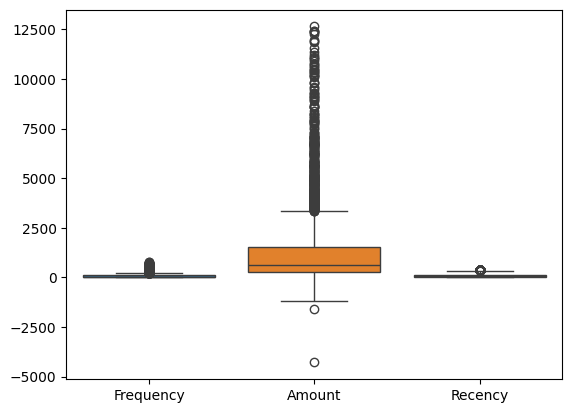

In [19]:
attributes = ['Frequency', 'Amount', 'Recency']
sns.boxplot(data=rfm[attributes])


In [19]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 578.9 kB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import StandardScaler
rfm_df = rfm[['Frequency', 'Amount', 'Recency']]
scaler = StandardScaler()
rescaled_rfm_df = scaler.fit_transform(rfm_df)

In [18]:
rescaled_rfm_df.shape

(4290, 3)

In [19]:
rescaled_rfm_df = pd.DataFrame(rescaled_rfm_df)
rescaled_rfm_df.columns = ['Frequency', 'Amount', 'Recency']
rescaled_rfm_df.head()

,Frequency,Amount,Recency
0,-0.749872,-0.738835,2.300765
1,1.041232,1.796627,-0.906903
2,-0.461305,0.318435,-0.184188
3,-0.043381,0.295086,-0.738600
4,-0.600614,-0.542116,2.142362


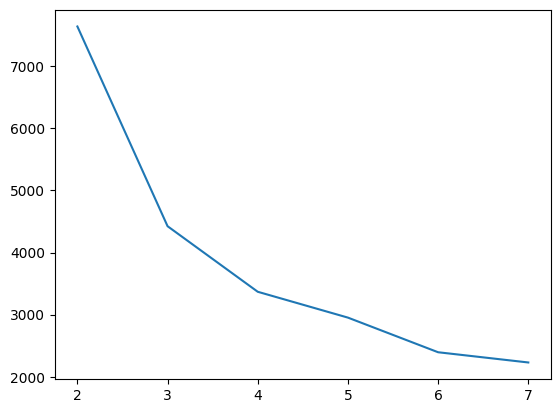

In [63]:
from sklearn.cluster import KMeans
distortion =[]
for i in range (2,8):
    km = KMeans(n_clusters=i, max_iter=50)
    km.fit(rescaled_rfm_df)
    distortion.append(km.inertia_)
plt.plot(range(2,8), distortion)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(rescaled_rfm_df)
clustering.labels_[:10]

array([1, 0, 2, 2, 1, 2, 1, 1, 1, 0])

In [22]:
km3 = KMeans(n_clusters=3, max_iter=50)
km3.fit(rescaled_rfm_df)
km3.labels_[:10]

array([2, 1, 0, 0, 2, 0, 2, 2, 2, 0], dtype=int32)

In [23]:
rfm['ClusterID'] = km3.labels_
rfm.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,325,2
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,2


In [24]:
rfm.rename(columns = {'ClusterID':'KMcluster'}, inplace = True)
rfm.head()

,CustomerID,Frequency,Amount,Recency,KMcluster
0,12346.0,2,0.00,325,2
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,2


In [25]:
rfm['HC_cluster'] = clustering.labels_
rfm.head()

,CustomerID,Frequency,Amount,Recency,KMcluster,HC_cluster
0,12346.0,2,0.00,325,2,1
1,12347.0,182,4310.00,1,1,0
2,12348.0,31,1797.24,74,0,2
3,12349.0,73,1757.55,18,0,2
4,12350.0,17,334.40,309,2,1


<Axes: xlabel='KMcluster', ylabel='Recency'>

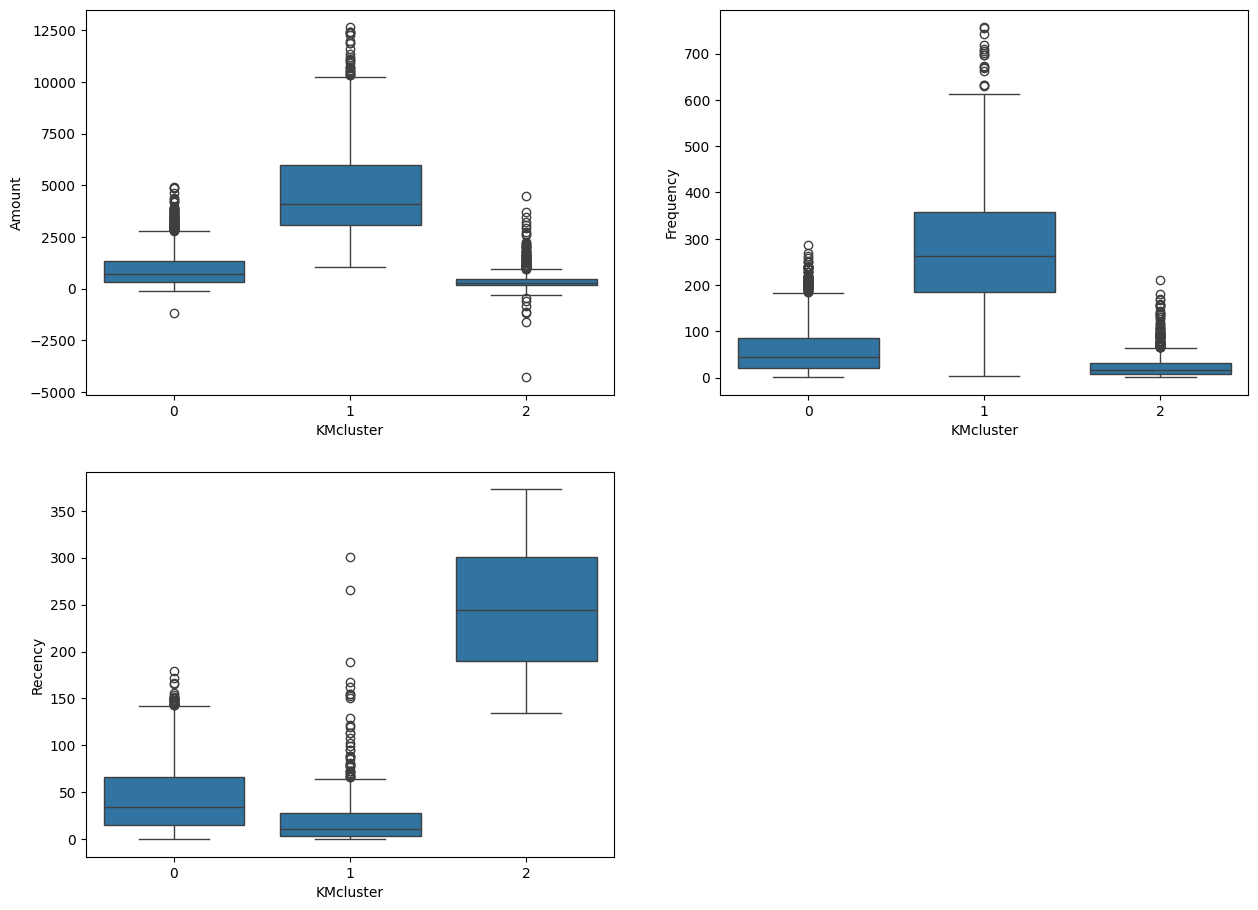

In [29]:
fig = plt.figure(figsize=(15,11))

plt.subplot(2,2,1)
sns.boxplot(x='KMcluster', y='Amount', data=rfm)
plt.subplot(2,2,2)
sns.boxplot(x='KMcluster', y='Frequency', data=rfm)
plt.subplot(2,2,3)
sns.boxplot(x='KMcluster', y='Recency', data=rfm)

<Axes: xlabel='HC_cluster', ylabel='Recency'>

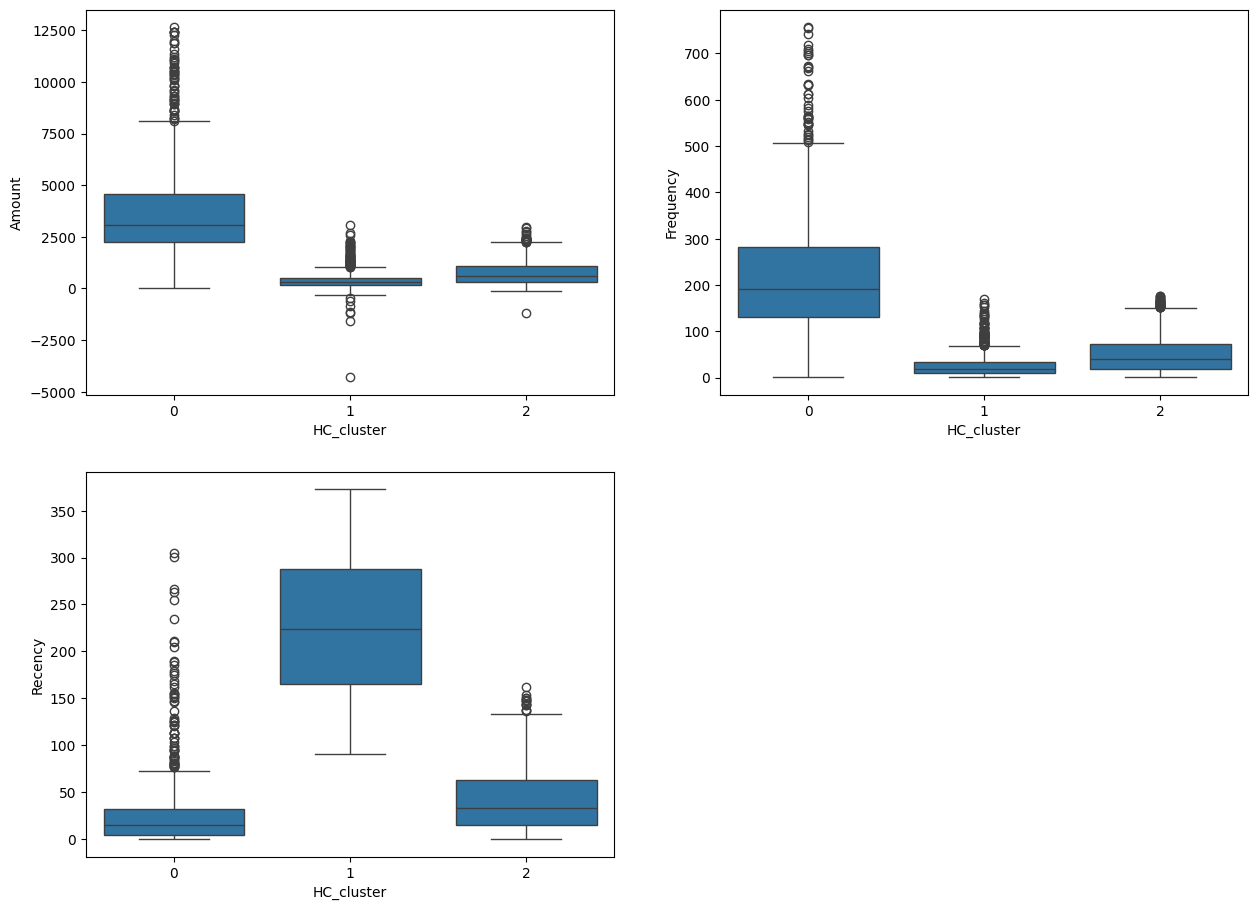

In [49]:
fig = plt.figure(figsize=(15,11))

plt.subplot(2,2,1)
sns.boxplot(x='HC_cluster', y='Amount', data=rfm)
plt.subplot(2,2,2)
sns.boxplot(x='HC_cluster', y='Frequency', data=rfm)
plt.subplot(2,2,3)
sns.boxplot(x='HC_cluster', y='Recency', data=rfm)

In [44]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.3 MB/s eta 0:00:00a 0:00:01


In [50]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = data[data['Quantity'] > 0]\
         .groupby(['InvoiceNo', 'Description'])['Quantity']\
         .sum()\
         .unstack()\
         .fillna(0)

basket_encoded = basket > 0

min_support_value = 0.02
frequent_itemsets = apriori(basket_encoded, min_support=min_support_value, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

print("\nAssociation Rules:")
print(rules.sort_values(by='lift', ascending=False).head(10))


Frequent Itemsets:
      support                              itemsets
192  0.106334  (WHITE HANGING HEART T-LIGHT HOLDER)
154  0.091929            (REGENCY CAKESTAND 3 TIER)
81   0.086319             (JUMBO BAG RED RETROSPOT)
124  0.074450                       (PARTY BUNTING)
11   0.074180       (ASSORTED COLOUR BIRD ORNAMENT)
102  0.069486             (LUNCH BAG RED RETROSPOT)
166  0.061826   (SET OF 3 CAKE TINS PANTRY DESIGN )
139  0.059290                             (POSTAGE)
95   0.056754             (LUNCH BAG  BLACK SKULL.)
116  0.055514     (PACK OF 72 RETROSPOT CAKE CASES)

Association Rules:
                                          antecedents  \
70  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
75                   (PINK REGENCY TEACUP AND SAUCER)   
72  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
73                  (GREEN REGENCY TEACUP AND SAUCER)   
8                   (GREEN REGENCY TEACUP AND SAUCER)   
9                    (PINK REGENCY TEACUP AND S

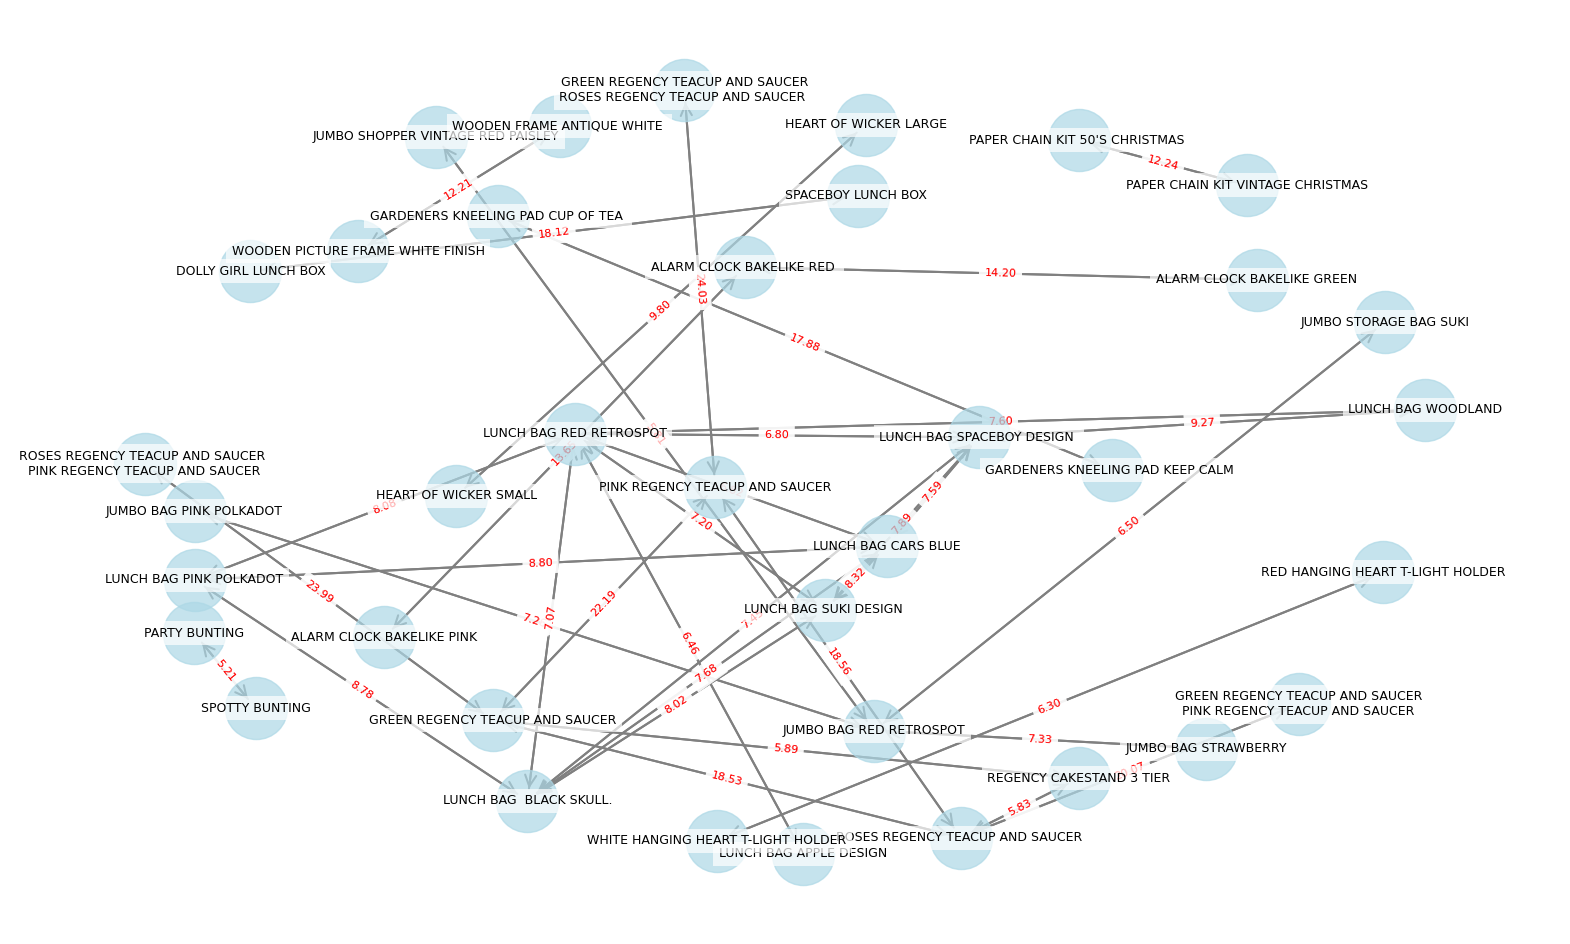

In [64]:
import networkx as nx

rules_filtered = rules[rules['lift'] > 5]

G = nx.DiGraph()

for _, row in rules_filtered.iterrows():
    antecedents = tuple(row['antecedents'])
    consequents = tuple(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

plt.figure(figsize=(20, 12))

pos = nx.spring_layout(G, k=3, seed=42)

labels = {}
for node in G.nodes():
    if isinstance(node, tuple) and len(node) > 1:
        labels[node] = "\n".join(node)  
    else:
        labels[node] = node if not isinstance(node, tuple) else node[0]

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray", width=1.5)

nx.draw_networkx_labels(
    G, pos, labels=labels, font_size=9, 
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=8, font_color="red",
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

plt.axis("off")
plt.show()
